<a href="https://colab.research.google.com/github/shindeal/Anjali/blob/main/BigDataFinalProject2022_1stpart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless


Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk-headless is already the newest version (8u312-b07-0ubuntu1~18.04).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz


--2022-05-17 14:12:02--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz.2’

spark-3.2.1-bin-had 100%[===================>] 260.01M  17.5MB/s    in 16s     

2022-05-17 14:12:18 (16.3 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz.2’ saved [272637746/272637746]



In [ ]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz


In [ ]:
!pip install -q findspark


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 515, in _det

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession



In [ ]:
spark = SparkSession.builder\
        .master("local")\
        .appName("CatchthePinkFlamingo")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
teamDF = spark.read.csv("team.csv", header=True, inferSchema=True)
teamDF.createOrReplaceTempView("team")
teamDF = spark.sql("select  * from team desc limit 10")
teamDF.show()

+------+----------+----------------+----------------+-----------+------------+
|teamId|      name|teamCreationTime|     teamEndTime|   strength|currentLevel|
+------+----------+----------------+----------------+-----------+------------+
|    79|   O1uJX7C|12/06/2016 15:33|31/12/9999 23:59|0.774473575|           1|
|    92|  WeLHp8HZ|12/06/2016 21:54|31/12/9999 23:59|0.171926026|           1|
|     6|    mARlfz|12/06/2016 23:02|31/12/9999 23:59|0.537353044|           1|
|     7|xO41jlAo0Y|13/06/2016 06:03|31/12/9999 23:59|0.394370371|           1|
|    40|   vdwO0k1|13/06/2016 07:01|31/12/9999 23:59|0.706832959|           1|
|    18| VpF5Lrtz7|13/06/2016 12:23|31/12/9999 23:59|0.885469892|           1|
|    91| 8brfgFZi6|13/06/2016 12:33|31/12/9999 23:59|0.478092156|           1|
|    90| 0sicoF7Pl|13/06/2016 13:06|31/12/9999 23:59|0.443162419|           1|
|    78|eGBdAiM6ti|13/06/2016 13:46|31/12/9999 23:59| 0.79692311|           1|
|     1|Rlwjub4jqE|13/06/2016 14:20|31/12/9999 23:59

In [ ]:
teamDF.show(1)

+------+-------+----------------+----------------+-----------+------------+
|teamId|   name|teamCreationTime|     teamEndTime|   strength|currentLevel|
+------+-------+----------------+----------------+-----------+------------+
|    79|O1uJX7C|12/06/2016 15:33|31/12/9999 23:59|0.774473575|           1|
+------+-------+----------------+----------------+-----------+------------+
only showing top 1 row



+-------+-----------+-----------+
|Team_ID|       name|   strength|
+-------+-----------+-----------+
|    161|    vBm7Odv|0.994851162|
|     46|   5ruGsz7L|0.957040326|
|      9|  pDG2bAh8T|0.952175553|
|    101|t1tqUapfHxV|0.947642097|
|     12|WHKzmMokDcK|0.943433611|
|     37|    q0jkZDf|0.941534161|
|    100|   GbqLMPFL|0.940340988|
|     75|CUHY52XVzcF|0.928966887|
|     31|  5ePMsvkuN|0.913882906|
|      8|  5aw5S13OD|0.908268818|
+-------+-----------+-----------+



<Figure size 432x288 with 0 Axes>

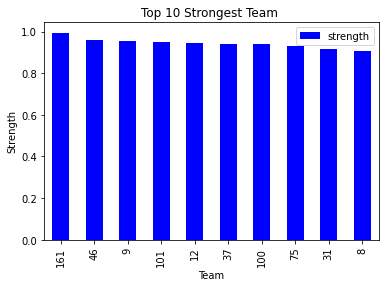

In [ ]:
#top 10 strongest team
s = spark.sql("select teamId as Team_ID,name,strength  from team order by strength desc limit 10")
s.show()
top_10_team = s.toPandas()
import matplotlib.pyplot as plt
plt.figure();
top_10_team.plot.bar( x="Team_ID", y="strength",color=['Blue'],title='Top 10 Strongest Team ',xlabel='Team',ylabel='Strength')

In [ ]:
top_10_team

,Team_ID,name,strength
0,161,vBm7Odv,0.994851
1,46,5ruGsz7L,0.957040
2,9,pDG2bAh8T,0.952176
3,101,t1tqUapfHxV,0.947642
4,12,WHKzmMokDcK,0.943434
5,37,q0jkZDf,0.941534
6,100,GbqLMPFL,0.940341
7,75,CUHY52XVzcF,0.928967
8,31,5ePMsvkuN,0.913883
9,8,5aw5S13OD,0.908269


[Text(0.5, 1.0, 'Top 10 Strongest Team')]

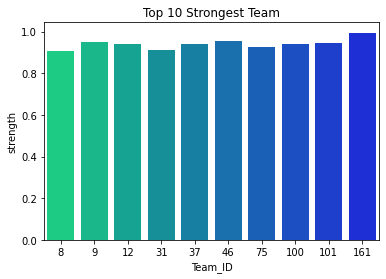

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x='Team_ID',y='strength',data=top_10_team,palette='winter_r').set(title='Top 10 Strongest Team')

In [ ]:
#to get time difference between start and end time, since there is no time difference nothing much to show on this
s = spark.sql("select teamCreationTime, teamEndTime, ((bigint(to_timestamp(teamEndTime)))-(bigint(to_timestamp(teamCreationTime))))/(60) as diff from team desc limit 10")
s.show()



+----------------+----------------+----+
|teamCreationTime|     teamEndTime|diff|
+----------------+----------------+----+
|12/06/2016 15:33|31/12/9999 23:59|null|
|12/06/2016 21:54|31/12/9999 23:59|null|
|12/06/2016 23:02|31/12/9999 23:59|null|
|13/06/2016 06:03|31/12/9999 23:59|null|
|13/06/2016 07:01|31/12/9999 23:59|null|
|13/06/2016 12:23|31/12/9999 23:59|null|
|13/06/2016 12:33|31/12/9999 23:59|null|
|13/06/2016 13:06|31/12/9999 23:59|null|
|13/06/2016 13:46|31/12/9999 23:59|null|
|13/06/2016 14:20|31/12/9999 23:59|null|
+----------------+----------------+----+



In [ ]:
userdf = spark.read.csv("users.csv", header=True, inferSchema=True)
userdf.createOrReplaceTempView("user")
userdf = spark.sql("select  * from user desc limit 10")
userdf.show(1)

+----------------+------+--------+--------+----------+-------+
|       timestamp|userId|    nick| twitter|       dob|country|
+----------------+------+--------+--------+----------+-------+
|19/06/2012 14:53|   442|pcjIOBKW|@SZhyOHv|20/07/1994|     BA|
+----------------+------+--------+--------+----------+-------+
only showing top 1 row



In [ ]:
#which country played the most
countrydf = spark.sql("select country,count(*) as count from user group by country order by count  desc limit 10")
countrydf.show()

+-------+-----+
|country|count|
+-------+-----+
|     RO|   10|
|     MN|   10|
|     ZM|   10|
|     LT|   10|
|     KI|   10|
|     TC|   10|
|     SL|   10|
|     FI|   10|
|     NL|   10|
|     SC|   10|
+-------+-----+



In [ ]:
#which country played the most
countrydf = spark.sql("select country,count(*) as count from user group by country order by count  desc limit 10")
countrydf.show()
top_10_c = countrydf.toPandas()

+-------+-----+
|country|count|
+-------+-----+
|     RO|   10|
|     MN|   10|
|     ZM|   10|
|     LT|   10|
|     KI|   10|
|     TC|   10|
|     SL|   10|
|     FI|   10|
|     NL|   10|
|     SC|   10|
+-------+-----+



[Text(0.5, 1.0, 'Top 10 Country')]

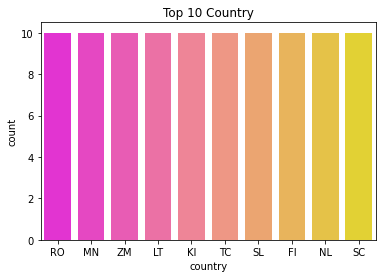

In [ ]:
#Top 10 countries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x='country',y='count',data=top_10_c,palette='spring').set(title='Top 10 Country')

In [ ]:
userdf.show(1)

+----------------+------+--------+--------+----------+-------+
|       timestamp|userId|    nick| twitter|       dob|country|
+----------------+------+--------+--------+----------+-------+
|19/06/2012 14:53|   442|pcjIOBKW|@SZhyOHv|20/07/1994|     BA|
+----------------+------+--------+--------+----------+-------+
only showing top 1 row



+----------+-----+----+----+
|Birth_Year|count|  cd| Age|
+----------+-----+----+----+
|      1994|   72|2022|28.0|
|      1992|   71|2022|30.0|
|      1989|   70|2022|33.0|
|      1984|   68|2022|38.0|
|      1979|   68|2022|43.0|
|      1985|   66|2022|37.0|
|      1991|   64|2022|31.0|
|      1997|   63|2022|25.0|
|      1996|   63|2022|26.0|
|      1993|   61|2022|29.0|
+----------+-----+----+----+



<Figure size 432x288 with 0 Axes>

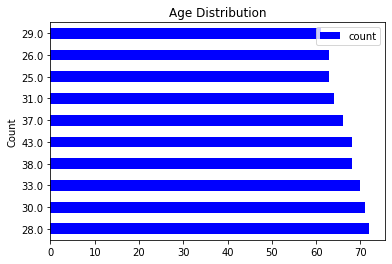

In [ ]:
#Date of Birth
dobdf = spark.sql("select substring(dob,7,5) as Birth_Year , count(*) as count, substring(current_date(),1,4) as cd,(substring(current_date(),1,4)-substring(dob,7,5))  as Age from user group by Birth_Year order by count(*) desc limit 10" )
dobdf.show(10)
#dobdf = spark.sql("select substring(dob,1,4) as db , count(*), substring(current_date(),1,4) as cd, datediff(substring(current_date(),1,4), substring(dob,1,4) ), (substring(current_date(),1,4)-substring(dob,1,4)) from user group by db order by count(*) desc" )
age_grp = dobdf.toPandas()
age_grp
import matplotlib.pyplot as plt
plt.figure();
age_grp.plot.barh(x="Age",color=['blue'],title='Age Distribution',xlabel='Count',ylabel='Age')



In [ ]:
age_grp

,Birth_Year,count,cd,Age
0,1994,72,2022,28.0
1,1992,71,2022,30.0
2,1989,70,2022,33.0
3,1984,68,2022,38.0
4,1979,68,2022,43.0
5,1985,66,2022,37.0
6,1991,64,2022,31.0
7,1997,63,2022,25.0
8,1996,63,2022,26.0
9,1993,61,2022,29.0


[Text(0.5, 1.0, 'Age Distribution')]

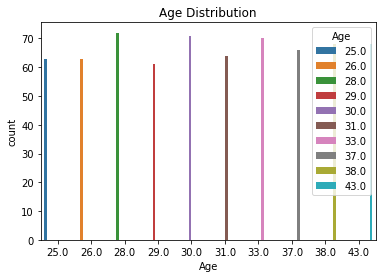

In [ ]:
#Age wise distribution
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x='Age',y='count',hue='Age',data=age_grp).set(title='Age Distribution')

[Text(0.5, 1.0, 'Year Wise Distribution')]

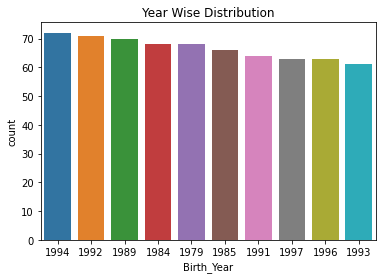

In [ ]:
sns.barplot(x='Birth_Year',y='count',data=age_grp).set(title='Year Wise Distribution')


In [ ]:
age_grp

,Birth_Year,count,cd,Age
0,1994,72,2022,28.0
1,1992,71,2022,30.0
2,1989,70,2022,33.0
3,1984,68,2022,38.0
4,1979,68,2022,43.0
5,1985,66,2022,37.0
6,1991,64,2022,31.0
7,1997,63,2022,25.0
8,1996,63,2022,26.0
9,1993,61,2022,29.0


In [ ]:
team_assdf = spark.read.csv("team-assignments.csv", header=True, inferSchema=True)
team_assdf.createOrReplaceTempView("team_ass")
team_assdf = spark.sql("select  * from team_ass desc limit 10")
team_assdf.show()

+----------------+----+------+------------+
|       timestamp|team|userId|assignmentId|
+----------------+----+------+------------+
|26/05/2016 14:06|  64|   504|        5439|
|26/05/2016 14:07|  39|  1698|        5301|
|26/05/2016 14:07|  85|    81|        5540|
|26/05/2016 14:07|  95|  1976|        5307|
|26/05/2016 14:07|  97|  1009|        5368|
|26/05/2016 14:07|  39|  1208|        5298|
|26/05/2016 14:07|  70|  1665|        5011|
|26/05/2016 14:07|  18|   665|        5235|
|26/05/2016 14:07|  44|  1962|        5058|
|26/05/2016 14:07|  59|   801|        5170|
+----------------+----+------+------------+



In [ ]:
#Device distribution details
user_sessdf = spark.read.csv("user-session.csv", header=True, inferSchema=True)
user_sessdf.createOrReplaceTempView("user_session")
user_sessdf = spark.sql("select platformType, count(*) as count from user_session group by platformType order by count desc limit 10")
user_sessdf.show()
device_grp = user_sessdf.toPandas()


+------------+-----+
|platformType|count|
+------------+-----+
|      iphone| 3874|
|     android| 3274|
|     windows| 1240|
|       linux|  504|
|         mac|  358|
+------------+-----+



In [ ]:
device_grp

,platformType,count
0,iphone,3874
1,android,3274
2,windows,1240
3,linux,504
4,mac,358


[Text(0.5, 1.0, 'Device Wise Distribution')]

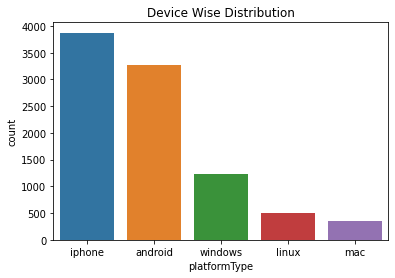

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.pie(x='platformType',y='count',data=device_grp).set(title='Year Wise Distribution')
sns.barplot(x='platformType',y='count',data=device_grp).set(title='Device Wise Distribution')


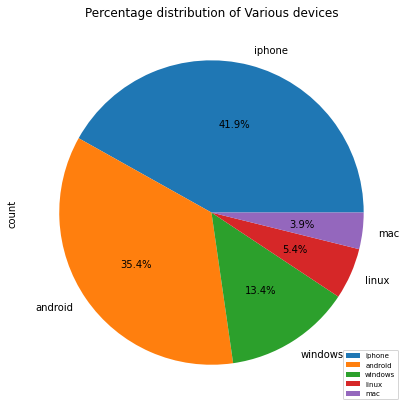

In [ ]:
my_labels=device_grp.platformType
device_grp.plot.pie(labels = my_labels,y="count",autopct='%1.1f%%', figsize=(8,7)) 
plt.title("Percentage distribution of Various devices")
plt.legend(my_labels, loc="best", fontsize=7)


In [ ]:
#Device wise user and team

In [ ]:
user_sessdf_dev = spark.read.csv("user-session.csv", header=True, inferSchema=True)
user_sessdf_dev.createOrReplaceTempView("user_session")
user_sessdf_dev = spark.sql("select userID,teamID, platformType, count(*) as count from user_session group by userID,teamID,platformType order by count desc limit 10")
user_sessdf_dev.show()
device_grp_dev = user_sessdf_dev.toPandas()

+------+------+------------+-----+
|userID|teamID|platformType|count|
+------+------+------------+-----+
|  1742|    85|     android|   16|
|   859|    70|     android|   16|
|  1815|    32|      iphone|   16|
|   801|    59|      iphone|   14|
|   662|    28|      iphone|   14|
|  1072|    13|      iphone|   14|
|  1016|   111|     windows|   14|
|   223|    75|     android|   14|
|   352|    94|      iphone|   14|
|  1270|    74|      iphone|   14|
+------+------+------------+-----+



In [ ]:
#g = sns.relplot(data=device_grp_dev, x="userID", y="teamID", col="platformType")
#g.set_axis_labels("UserId", "TeamId")

In [ ]:
#sns.displot(data=device_grp_dev, x="platformType", hue="count", col="userID")


In [ ]:
#Top user id highest team level
user_sess_team= spark.read.csv("user-session.csv", header=True, inferSchema=True)
user_sess_team.createOrReplaceTempView("user_session")
team_level = spark.sql("select userId,teamLevel, count(*) as count from user_session group by userId,teamLevel order by teamLevel desc limit 10")
team_level.show()
team_level_df = team_level.toPandas()

+------+---------+-----+
|userId|teamLevel|count|
+------+---------+-----+
|  1721|        8|    2|
|  1742|        8|    2|
|  1815|        8|    2|
|   859|        8|    2|
|    75|        8|    2|
|  2214|        7|    2|
|   455|        7|    2|
|  1558|        7|    2|
|  2341|        7|    2|
|   995|        7|    2|
+------+---------+-----+



[Text(0.5, 1.0, 'Team level')]

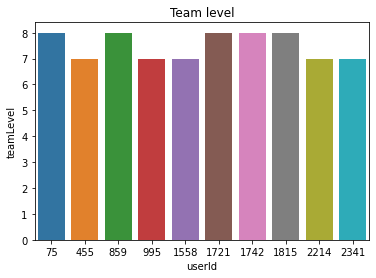

In [ ]:
#Top UserId with Teamlevel
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='userId',y='teamLevel',data=team_level_df).set(title='Team level')


+----+----------+
|team|sum(price)|
+----+----------+
|  27|     880.0|
|  54|     777.0|
|  35|     710.0|
|  64|     693.0|
|  53|     677.0|
|  66|     647.0|
|  59|     644.0|
|  11|     587.0|
|  97|     549.0|
|  22|     535.0|
+----+----------+



[Text(0.5, 1.0, 'Top 10 Buyer')]

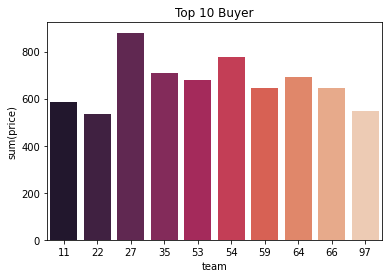

In [ ]:
#Top 10 buyer
df = spark.read.csv("buy-clicks.csv", header=True, inferSchema=True)
df.createOrReplaceTempView("buy_click")
sqlDF = spark.sql("select  team ,sum(price) from buy_click group by team order by sum(price) desc limit 10")
sqlDF.show()
type(sqlDF)
top_10_team = sqlDF.toPandas()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure();
#top_10_team.plot.barh( x="team", y="sum(price)",color=['Blue', 'red', 'green'],title='Top 10 Buyer ',xlabel='Team',ylabel='Price')
sns.barplot(data=top_10_team, x="team", y="sum(price)",palette="rocket").set(title='Top 10 Buyer')


+-----+---------+
|buyID|purchased|
+-----+---------+
|    2|      714|
|    5|      610|
|    0|      592|
|    4|      425|
|    3|      337|
|    1|      269|
+-----+---------+



<Figure size 432x288 with 0 Axes>

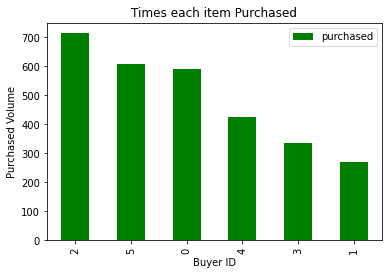

In [ ]:
#**How many times each item was purchased**
sqlDF = spark.sql("select  buyID ,count(*) as purchased from buy_click group by buyID order by purchased desc")
sqlDF.show()
type(sqlDF)
top_purchase = sqlDF.toPandas()
import matplotlib.pyplot as plt
plt.figure();
top_purchase.plot.bar( x="buyID",color=['green'],title='Times each item Purchased',xlabel='Buyer ID',ylabel='Purchased Volume')

+-----+-------+
|buyID| amount|
+-----+-------+
|    5|12200.0|
|    4| 4250.0|
|    2| 2142.0|
|    3| 1685.0|
|    0|  592.0|
|    1|  538.0|
+-----+-------+



<Figure size 432x288 with 0 Axes>

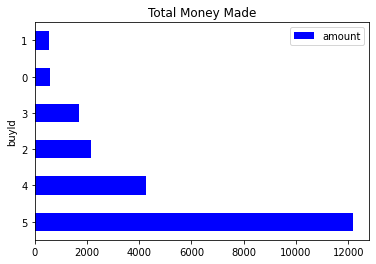

In [ ]:
#how much money was made from each item
sqlDF = spark.sql("select buyID , sum(price) as amount from buy_click group by buyID order by amount desc")
sqlDF.show()
type(sqlDF)
amt_made = sqlDF.toPandas()
import matplotlib.pyplot as plt
plt.figure();
amt_made.plot.barh( x="buyID",color=['blue'],title='Total Money Made',xlabel='buyId',ylabel='Amount')

+------+------+
|userId|amount|
+------+------+
|  2229| 223.0|
|    12| 215.0|
|   471| 202.0|
|   511| 200.0|
|  1027| 189.0|
|  1260| 183.0|
|   670| 183.0|
|   352| 180.0|
|  1697| 172.0|
|  1732| 172.0|
+------+------+



<Figure size 432x288 with 0 Axes>

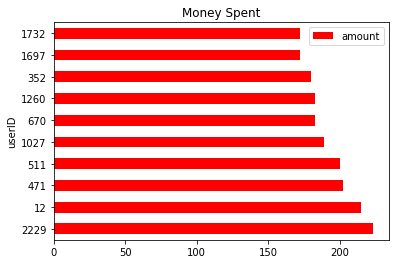

In [ ]:
#Top 10 user spender
sqlDF = spark.sql("select userId , sum(price) as amount from buy_click group by userId order by amount desc limit 10")
sqlDF.show()
type(sqlDF)
amt_spent = sqlDF.toPandas()
import matplotlib.pyplot as plt
plt.figure();
amt_spent.plot.barh( x="userId",color=['red'],title='Money Spent',xlabel='userID',ylabel='Amount')

+-----------+-------+
| adCategory|volumne|
+-----------+-------+
|  computers|   2638|
|      games|   2601|
|   clothing|   2340|
|     sports|   2074|
|    fashion|   1727|
|     movies|   1692|
|   hardware|   1588|
|electronics|   1097|
| automotive|    566|
+-----------+-------+



<Figure size 432x288 with 0 Axes>

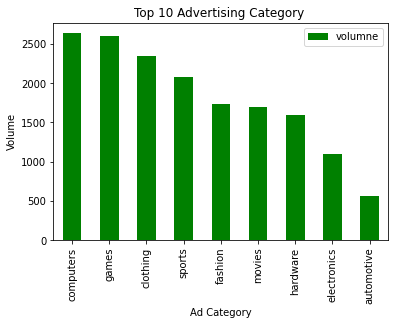

In [145]:
#**Top 10 ad on the game**
df = spark.read.csv("ad-clicks.csv", header=True, inferSchema=True)
df.createOrReplaceTempView("ad_clicks")
sqlDF = spark.sql("select adCategory, count(*) as volumne from ad_clicks group by adCategory order by volumne desc limit 10  ")
sqlDF.show()
type(sqlDF)
top_10_cat = sqlDF.toPandas()
import matplotlib.pyplot as plt
plt.figure();
top_10_cat.plot.bar( x="adCategory",color=['green'],title='Top 10 Advertising Category ',xlabel='Ad Category',ylabel='Volume')

